#implementing Multivariate Logistic Regression

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
def initialization(n_features, n_classes):
    w = np.random.randn(n_classes, n_features)
    b = np.zeros((n_classes, 1))
    return w, b

In [25]:
def softmax(z):
    z_exp = np.exp(z - np.max(z, axis=0, keepdims=True)) 
    a = z_exp / np.sum(z_exp, axis=0, keepdims=True)
    return a

In [26]:
def forward(x, w, b):
    z = np.dot(w, x) + b
    a = softmax(z)
    return a

In [27]:
def cost(a, y):
    m = y.shape[1]
    epsilon = 1e-15  # small value to avoid log(0)
    j = -(1/m) * np.sum(y * np.log(a + epsilon))
    return j

In [28]:
def backpropagation(x, y, a):
    m = x.shape[1]
    dz = a - y  # derivative of the cost with respect to z
    dw = (1/m) * np.dot(dz, x.T)
    db = (1/m) * np.sum(dz, axis=1, keepdims=True)
    return dw, db

In [29]:
def gradient(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

In [30]:
def one_hot_encode(y, n_classes):
    m = y.shape[0]
    one_hot = np.zeros((n_classes, m))
    one_hot[y, np.arange(m)] = 1
    return one_hot

In [35]:
# Loading  the iris dataset
data = load_iris()
X = data.data       
y = data.target  

# Standardize the features for improved convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

X_train = X_train.T  
X_test = X_test.T  

# One-hot encode the labels
n_classes = len(np.unique(y))
y_train_encoded = one_hot_encode(y_train, n_classes)  
y_test_encoded = one_hot_encode(y_test, n_classes) 

In [39]:
n_features = X_train.shape[0]
w, b = initialization(n_features, n_classes)

lr= 0.01
n_iterations = 1000
costs = []

for i in range(n_iterations):
    # Forward propagation
    a = forward(X_train, w, b)
    
    # Computing the cost
    current_cost = cost(a, y_train_encoded)
    costs.append(current_cost)
    
    # Backpropagation
    dw, db = backpropagation(X_train, y_train_encoded, a)
    
    # Update parameters using gradient descent
    w, b = gradient(w, b, dw, db, lr)
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {current_cost}")

print("\nLearned parameters:")
print("Weights:\n", w)
print("Bias:\n", b)

Iteration 0: Cost = 4.248494382569302
Iteration 100: Cost = 1.9042672134596432
Iteration 200: Cost = 0.8834240286151667
Iteration 300: Cost = 0.5987721194260821
Iteration 400: Cost = 0.4963683740345524
Iteration 500: Cost = 0.44331301202963047
Iteration 600: Cost = 0.40952004654622604
Iteration 700: Cost = 0.3853308320448078
Iteration 800: Cost = 0.3666748353526761
Iteration 900: Cost = 0.35151978810797113

Learned parameters:
Weights:
 [[-0.47884106  0.83616007 -1.65045337 -1.37726722]
 [-1.46315303  0.62360152  0.31073266  0.38547104]
 [-1.00230524  1.2729917   0.34292238  1.92206357]]
Bias:
 [[-0.38491854]
 [ 0.46703316]
 [-0.08211463]]


In [40]:
#testing
a_test = forward(X_test, w, b)
predictions = np.argmax(a_test, axis=0)
accuracy = np.mean(predictions == y_test) * 100
print("\nTest set accuracy: {:.2f}%".format(accuracy))


Test set accuracy: 90.00%


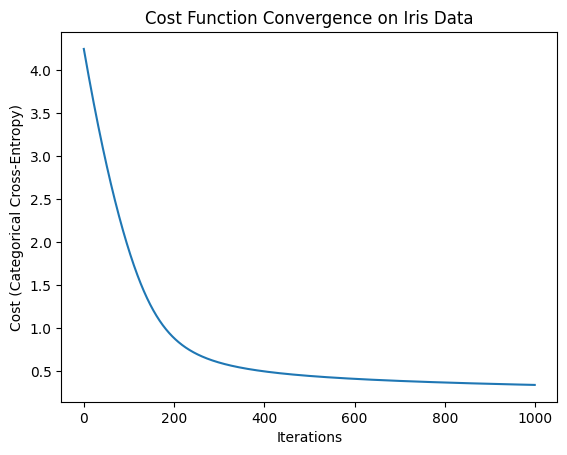

In [41]:
# Plot the cost history to visualize convergence
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost (Categorical Cross-Entropy)")
plt.title("Cost Function Convergence on Iris Data")
plt.show()